# Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import io
import string

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Download Dataset

* https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8

In [2]:
URL = 'https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8'
file_path = tf.keras.utils.get_file('song_data.csv', URL)
print(file_path)

66928640/Unknown - 1s 0us/step/root/.keras/datasets/song_data.csv


In [3]:
dataset = pd.read_csv(file_path, dtype=str)[:10]
dataset

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \nYou're enc..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \nCouldn't sle...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \nI'm sitting all al...


# Preprocess Dataset

In [8]:
def create_lyrics_corpus(dataset, field):
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
  dataset[field] = dataset[field].str.lower()

  lyrics = dataset[field].str.cat()
  corpus = lyrics.split('\n')

  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  corpus = [l for l in corpus if l != '']

  return corpus

In [9]:
def tokenize_corpus(corpus, num_words=-1):
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()

  tokenizer.fit_on_texts(corpus)
  return tokenizer

In [10]:
# Create the corpus using the text 'column'
corpus = create_lyrics_corpus(dataset, 'text')

In [12]:
len(corpus), type(corpus)

(341, list)

In [11]:
# Tokenize the corpus
tokenizer = tokenize_corpus(corpus)

In [14]:
tokenizer

In [16]:
total_words = len(tokenizer.word_index) + 1
print(total_words)

495


In [22]:
tmp_seq = corpus[0]
print(tmp_seq)

tmp_seq = tokenizer.texts_to_sequences([tmp_seq])
print(tmp_seq)

look at her face its a wonderful face
[[81, 82, 142, 197, 29, 4, 287, 197]]


# Create Sequences

In [24]:
sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(len(token_list)):
    n_gram_seq = token_list[:i+1]
    sequences.append(n_gram_seq)

sequences[0:10]

[[81],
 [81, 82],
 [81, 82, 142],
 [81, 82, 142, 197],
 [81, 82, 142, 197, 29],
 [81, 82, 142, 197, 29, 4],
 [81, 82, 142, 197, 29, 4, 287],
 [81, 82, 142, 197, 29, 4, 287, 197],
 [3],
 [3, 11]]

In [26]:
max_seq_len = max([len(seq) for seq in sequences])
print(max_seq_len)

sequences = np.array(pad_sequences(sequences,
                                   maxlen=max_seq_len,
                                   padding='pre'))

sequences[0:10]

20


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  81],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  81,  82],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  81,  82, 142],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  81,  82, 142, 197],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  81,  82, 142, 197,  29],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  81,  82, 142, 197,  29,   4],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81,  82, 142, 197,  29,   4, 287],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81,
         82, 142, 197,  29,   4, 287, 197],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

# Split Sequences into input sequence and output predicted word

In [38]:
len(sequences)

2323

In [39]:
input_sequences, labels = sequences[:, :-1], sequences[:,-1]
input_sequences[0], labels[0]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32), 81)

In [40]:
len(input_sequences), len(labels)

(2323, 2323)

# One Hot Encode Lables

In [41]:
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)
one_hot_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Check Data

In [42]:
print(tokenizer.word_index['know'])
print(tokenizer.word_index['feeling'])

print(input_sequences[5])
print(input_sequences[6])

print(one_hot_labels[5])
print(one_hot_labels[6])

32
97
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197
  29]
[  0   0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29
   4]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [43]:
len(input_sequences), len(one_hot_labels)

(2323, 2323)

# Train a Text Generation Model

In [46]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=total_words,
                                    output_dim=64,
                                    input_length=max_seq_len-1))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)))
model.add(tf.keras.layers.Dense(units=total_words,
                                activation='softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 19, 64)            31680     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 40)                13600     
_________________________________________________________________
dense_2 (Dense)              (None, 495)               20295     
Total params: 65,575
Trainable params: 65,575
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = model.fit(x=input_sequences,
                    y=one_hot_labels,
                    epochs=200)

Epoch 1/200
73/73 [==============================] - 4s 15ms/step - loss: 5.9193 - accuracy: 0.0370
Epoch 2/200
73/73 [==============================] - 1s 15ms/step - loss: 5.4329 - accuracy: 0.0366
Epoch 3/200
73/73 [==============================] - 1s 16ms/step - loss: 5.3688 - accuracy: 0.0405
Epoch 4/200
73/73 [==============================] - 1s 15ms/step - loss: 5.3026 - accuracy: 0.0418
Epoch 5/200
73/73 [==============================] - 1s 17ms/step - loss: 5.2320 - accuracy: 0.0409
Epoch 6/200
73/73 [==============================] - 1s 15ms/step - loss: 5.1626 - accuracy: 0.0465
Epoch 7/200
73/73 [==============================] - 1s 15ms/step - loss: 5.0958 - accuracy: 0.0456
Epoch 8/200
73/73 [==============================] - 1s 16ms/step - loss: 5.0161 - accuracy: 0.0573
Epoch 9/200
73/73 [==============================] - 1s 15ms/step - loss: 4.9172 - accuracy: 0.0766
Epoch 10/200
73/73 [==============================] - 1s 15ms/step - loss: 4.8250 - accuracy: 0.0818

In [50]:
def plot_graph(history, string):
  plt.plot(history.history[string])
  # plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  # plt.legend([string, 'val_'+string])
  plt.show()

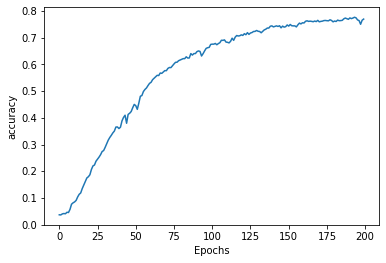

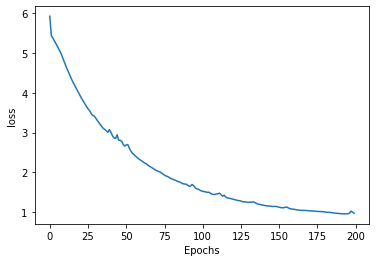

In [51]:
plot_graph(history, 'accuracy')
plot_graph(history, 'loss')

# Generate New Lyrics

In [52]:
seed_text = 'im feeling chills'
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences(sequences=[token_list],
                             maxlen=max_seq_len-1,
                             padding='pre')
  predicted = np.argmax(model.predict(token_list), axis=-1)

  output_word = ''
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word

print(seed_text)


im feeling chills that to take it no more to the bone yourself care world would better pavement tough song mine new walk new walk been walk been walk you were morning yourself was tough take yourself yourself is walk give cassandra cassandra cassandra i didnt believe cassandra yourself care be walk a break sucker would weave rely feeling feeling boomaboomerang new new new walk heartaches happy new walk my kind giving girl leaving her her im blue eye wait sure do do was morning do think boomaboomerang love feeling boomaboomerang boomaboomerang love cassandra friend i realized crazy new new shoulder body my
